In [2]:
#Set up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
sns.set()

In [3]:
#Dataset that should go with Alzheimer label
very_mild =glob(r"C:\Users\bhupi\OneDrive\Desktop\Very_Mild_Demented\*")
mild = glob(r"C:\Users\bhupi\OneDrive\Desktop\Mild_Demented\*")
moderate = glob(r"C:\Users\bhupi\OneDrive\Desktop\Moderate_Demented\*")

#Dataset without Alzheimer
non = glob(r"C:\Users\bhupi\OneDrive\Desktop\Non_Demented\*")

C:\Users\bhupi\OneDrive\Desktop\Non_Demented\non_10.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

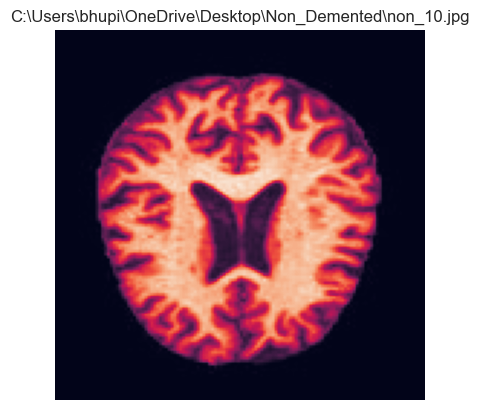

In [4]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

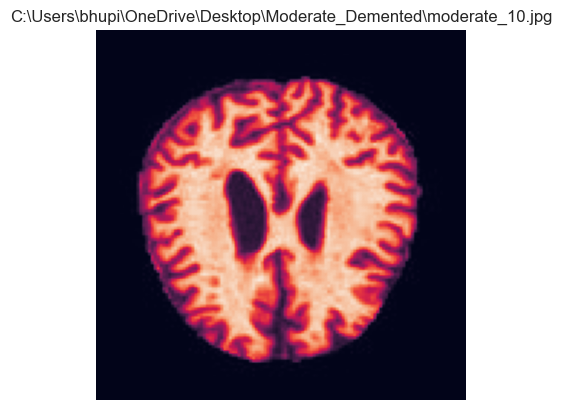

In [5]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

Number of components explaining 80% variance: 174
[[  3.5360064  -13.34759359   4.34076905 ...  -0.28226674   0.55839962
   -0.59925272]
 [  7.173231    -3.20480294  14.62910457 ...  -0.50188912   0.40035203
    0.88318089]
 [-10.48605149 -20.70301774   4.52770576 ...   1.84069891  -0.31693673
   -0.63870558]
 ...
 [ -6.65791006 -15.78451842  -4.05650985 ...   1.35579588   1.23300969
    0.84844624]
 [ 18.80938526   2.36238362   4.48065479 ...   1.81244062  -1.57208281
   -0.99540013]
 [ 18.02783801   7.5824566   -2.58575864 ...   0.77747296  -0.85951337
    0.36631137]]


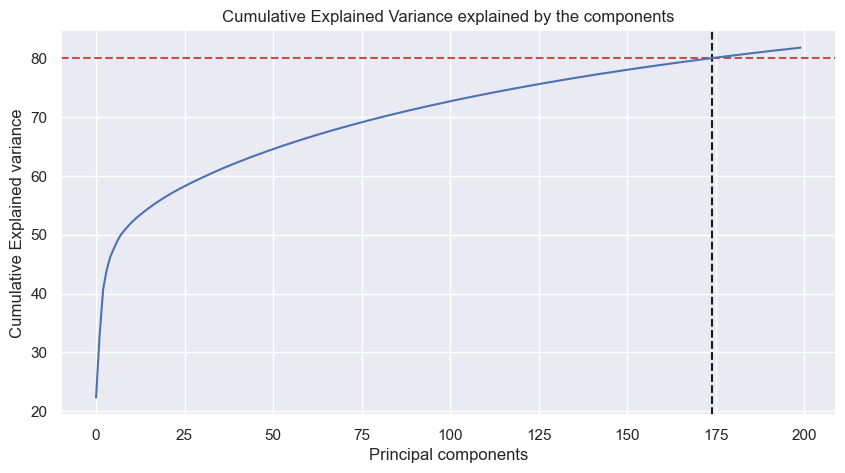

In [6]:
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

non_ALZ = [extract_feature(filename) for filename in non]
vmild_ALZ = [extract_feature(filename) for filename in very_mild]
mild_ALZ = [extract_feature(filename) for filename in mild]
moderate_ALZ = [extract_feature(filename) for filename in moderate]
ALZ = vmild_ALZ + mild_ALZ + moderate_ALZ

#for PCA
all_data = np.concatenate((np.array(non_ALZ),np.array(ALZ)))
#print(all_data)
all_data = all_data.reshape(all_data.shape[0], np.product(all_data.shape[1:]))

scaler = StandardScaler()
scaler.fit(all_data)

#standardize data to 0 mean and unit variance
X = scaler.transform(all_data)

#split the data 
from sklearn.model_selection import train_test_split
y = [0] * len(non_ALZ) + [1] * len(ALZ)
X_train, X_test, y_train, y_test = train_test_split(all_data, y, test_size=0.2)

scala = preprocessing.StandardScaler()
#Compressing the images into two dimensions using PCA
pca = decomposition.PCA(200)
X_proj = pca.fit_transform(X_train)

#let's first see which principal component works better
#scree plot but cumulative
# Getting the cumulative variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100 #100 is multiplied for percentage
 
# How many PCs explain 90% of the variance?
k = np.argmax(var_cumu>80)
print("Number of components explaining 80% variance: "+ str(k)) #I guess, I will have to use 160 axis
#print("\n")
 
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=80, color="r", linestyle="--")
ax = plt.plot(var_cumu)

print(X_proj)

In [7]:
import os

folders = [
    r"C:\Users\bhupi\OneDrive\Desktop\Very_Mild_Demented",
    r"C:\Users\bhupi\OneDrive\Desktop\Mild_Demented",
    r"C:\Users\bhupi\OneDrive\Desktop\Moderate_Demented",
    r"C:\Users\bhupi\OneDrive\Desktop\Non_Demented"
]

for folder in folders:
    print(f"Checking folder: {folder}")
    print("Exists:", os.path.exists(folder))
    print("Files:", os.listdir(folder) if os.path.exists(folder) else "Folder not found")


Checking folder: C:\Users\bhupi\OneDrive\Desktop\Very_Mild_Demented
Exists: True
Files: ['verymild.jpg', 'verymild_10.jpg', 'verymild_100.jpg', 'verymild_1000.jpg', 'verymild_1001.jpg', 'verymild_1002.jpg', 'verymild_1003.jpg', 'verymild_1004.jpg', 'verymild_1005.jpg', 'verymild_1006.jpg', 'verymild_1007.jpg', 'verymild_1008.jpg', 'verymild_1009.jpg', 'verymild_101.jpg', 'verymild_1010.jpg', 'verymild_1011.jpg', 'verymild_1012.jpg', 'verymild_1013.jpg', 'verymild_1014.jpg', 'verymild_1015.jpg', 'verymild_1016.jpg', 'verymild_1017.jpg', 'verymild_1018.jpg', 'verymild_1019.jpg', 'verymild_102.jpg', 'verymild_1020.jpg', 'verymild_1021.jpg', 'verymild_1022.jpg', 'verymild_1023.jpg', 'verymild_1024.jpg', 'verymild_1025.jpg', 'verymild_1026.jpg', 'verymild_1027.jpg', 'verymild_1028.jpg', 'verymild_1029.jpg', 'verymild_103.jpg', 'verymild_1030.jpg', 'verymild_1031.jpg', 'verymild_1032.jpg', 'verymild_1033.jpg', 'verymild_1034.jpg', 'verymild_1035.jpg', 'verymild_1036.jpg', 'verymild_1037.jpg'

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train_LDA = lda.fit_transform(X_train, y_train)
X_test_LDA = lda.transform(X_test)
accuracy = lda.score(X_test, y_test)
print(accuracy*100, '% accuracy (testing data)' )
accuracy_train = lda.score(X_train, y_train)
print(accuracy_train*100, '% accuracy (training data)')

89.296875 % accuracy (testing data)
99.98046875 % accuracy (training data)


# SVM for Alzheimer Detection

In [9]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)



In [13]:
print(len(non))
print(len(ALZ)) #data are well transformed. Let's conduct SVM
print(len(resized_image_array))
print(resized_image_array[1])

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)


3200
3200
6400
[0 0 0 ... 0 0 0]


In [14]:
#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #Having high training data accuracy might mean that it is having some overfitting

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix : [[2568    0]
 [   0 2552]]
Accuracy :  0.9859375
Precision :  0.9846153846153847
Recall :  0.9876543209876543
f1 :  0.9861325115562404
Confusion matrix : [[622  10]
 [  8 640]]


In [15]:
#Train a SVM using polynomial kernel with degree of 2
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.8921875
Precision :  0.8808073115003808
Recall :  0.9063479623824452
f1 :  0.8933951332560834
Confusion matrix : [[2255  313]
 [ 239 2313]]
Accuracy :  0.86484375
Precision :  0.8528974739970282
Recall :  0.8858024691358025
f1 :  0.8690386071158214
Confusion matrix : [[533  99]
 [ 74 574]]


# Alzheimer Classifier

In [17]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        elif image_directory == very_mild:
            resized_image_array_label.append(1)
        elif image_directory == mild:
            resized_image_array_label.append(2)
        else:
            resized_image_array_label.append(3)

resizer(non)
resizer(very_mild)
resizer(mild)
resizer(moderate)

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

Accuracy :  1.0
Accuracy :  0.990625
